In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
raw_data = pd.read_csv("PatientInfo.csv")
raw_data

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


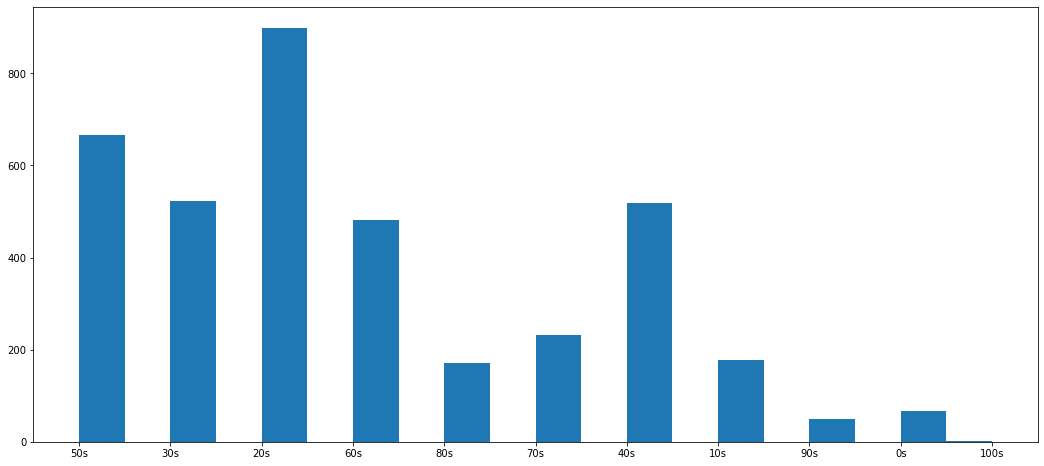

In [5]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False);

In [6]:
raw_data.groupby('province').count() #다른 정보를 숫자로 바꿔야하겠다

,patient_id,sex,age,country,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
province,,,,,,,,,,,,,
Busan,151,149,149,151,150,150,33,146,72,151,0,0,151
Chungcheongbuk-do,56,56,56,56,56,56,8,0,0,56,50,0,56
Chungcheongnam-do,168,167,168,168,168,168,126,156,69,168,150,0,168
Daegu,137,137,137,137,95,27,9,1,8,137,4,20,137
Daejeon,119,119,119,119,119,119,52,107,39,119,44,1,119
Gangwon-do,63,63,61,63,63,63,0,38,0,63,28,3,63
Gwangju,44,44,44,44,0,44,18,26,6,44,26,0,44
Gyeonggi-do,1208,830,830,1208,1208,1207,636,121,203,1208,61,1,1208
Gyeongsangbuk-do,1254,1252,1246,1254,1254,541,102,63,25,1251,862,40,1254


In [7]:
regions = raw_data['province'].unique()
regions

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Gyeonggi-do', 'Sejong', 'Ulsan', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [8]:
tmp = []
for each in raw_data['province']:
    if each == 'Seoul' or each == 'Gyeonggi-do' or each == 'Incheon':
        tmp.append(1)
    elif each == 'Busan' or each == 'Daegu' or each == 'Ulsan' or each == 'Gyeongsangbuk-do' or each == 'Gyeongsangnam-do':
        tmp.append(2)
    elif each == 'Gwangju' or each == 'Jeollabuk-do' or each == 'Jeollanam-do':
        tmp.append(3)
    elif each == 'Daejeon' or each == 'Sejong' or each == 'Chungcheongbuk-do' or each == 'Chungcheongnam-do':
        tmp.append(4)
    elif each == 'Gangwon-do':
        tmp.append(5)
    else:#jeju
        tmp.append(6)

raw_data['province'] = tmp

raw_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,1,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,1,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,1,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,1,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,1,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [9]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,1.0,50s,Korea,1,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,1.0,30s,Korea,1,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,1.0,50s,Korea,1,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,1.0,20s,Korea,1,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,0.0,20s,Korea,1,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [10]:
ages = raw_data['age'].unique()
ages

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '100s'], dtype=object)

In [11]:
tmp = []
for each in raw_data['age']:
    if each == '0s':
        tmp.append(0)
    elif each == '10s':
        tmp.append(1)
    elif each == '20s':
        tmp.append(2)
    elif each == '30s':
        tmp.append(3)
    elif each == '40s':
        tmp.append(4)
    elif each == '50s':
        tmp.append(5)
    elif each == '60s':
        tmp.append(6)
    elif each == '70s' or each == '80s' or each == '90s' or each == '100s':
        tmp.append(7)
    else:
        tmp.append(np.nan)

raw_data['age'] = tmp

raw_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,1.0,5.0,Korea,1,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,1.0,3.0,Korea,1,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,1.0,5.0,Korea,1,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,1.0,2.0,Korea,1,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,0.0,2.0,Korea,1,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [12]:
howto = raw_data['infection_case'].unique()
howto

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

In [13]:
tmp = []
for each in raw_data['infection_case']:
    if each == 'overseas inflow':
        tmp.append(1)
    else:
        tmp.append(0)

raw_data['infection_case'] = tmp

raw_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,1.0,5.0,Korea,1,Gangseo-gu,1,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,1.0,3.0,Korea,1,Jungnang-gu,1,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,1.0,5.0,Korea,1,Jongno-gu,0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,1.0,2.0,Korea,1,Mapo-gu,1,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,0.0,2.0,Korea,1,Seongbuk-gu,0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [14]:
result = raw_data['state'].unique()
result

array(['released', 'deceased', 'isolated'], dtype=object)

In [15]:
tmp = []
for each in raw_data['state']:
    if each == 'deceased':
        tmp.append(1)
    else:
        tmp.append(0)
        
raw_data['state'] = tmp
raw_data.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,1.0,5.0,Korea,1,Gangseo-gu,1,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,0
1,1000000002,1.0,3.0,Korea,1,Jungnang-gu,1,NaN,31,NaN,2020-01-30,2020-03-02,NaN,0
2,1000000003,1.0,5.0,Korea,1,Jongno-gu,0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,0
3,1000000004,1.0,2.0,Korea,1,Mapo-gu,1,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,0
4,1000000005,0.0,2.0,Korea,1,Seongbuk-gu,0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,0


In [58]:
# province: 1)수도권 2)경상 3) 전라 4) 충청 5) 강원 6)제주
# sex: 0)여성 1)남성
# age: 0~6: n0대, 7: 70세 이상
# infection_case: 1) overseas inflow 0) 그 외(국내)
# state: 1) deceased 0) 생존
raw_data = raw_data[['sex','age','province','infection_case','state']]
raw_data.head()

,sex,age,province,infection_case,state
0,1.0,5.0,1,1,0
1,1.0,3.0,1,1,0
2,1.0,5.0,1,0,0
3,1.0,2.0,1,1,0
4,0.0,2.0,1,0,0


In [59]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4043 non-null   float64
 1   age             3785 non-null   float64
 2   province        5165 non-null   int64  
 3   infection_case  5165 non-null   int64  
 4   state           5165 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 201.9 KB


In [60]:
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sex'].notnull()]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3782 entries, 0 to 5160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3782 non-null   float64
 1   age             3782 non-null   float64
 2   province        3782 non-null   int64  
 3   infection_case  3782 non-null   int64  
 4   state           3782 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 177.3 KB


C:\Users\tjoeun709\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


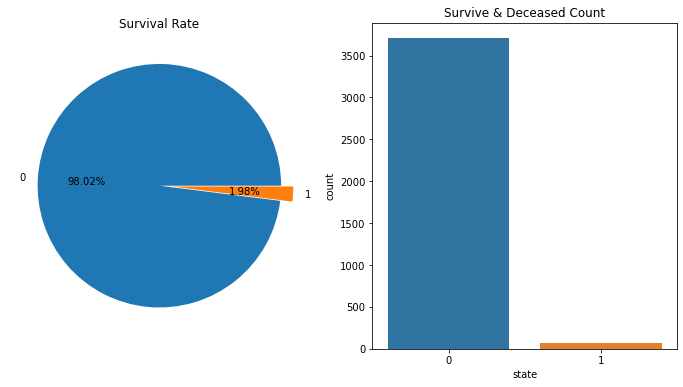

In [61]:
#코로나 확진자 중 생존자/비생존자 그래프화
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['state'].value_counts().plot.pie(explode=[0,0.1],
                                                   autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survival Rate')
ax[0].set_ylabel('')

sns.countplot('state',data=raw_data,ax=ax[1])
ax[1].set_title('Survive & Deceased Count')
plt.show()

In [62]:
raw_data.corr()

,sex,age,province,infection_case,state
sex,1.000000,-0.117827,-0.021378,0.077341,0.049565
age,-0.117827,1.000000,0.032396,-0.247560,0.192785
province,-0.021378,0.032396,1.000000,-0.098328,0.025366
infection_case,0.077341,-0.247560,-0.098328,1.000000,-0.064859
state,0.049565,0.192785,0.025366,-0.064859,1.000000


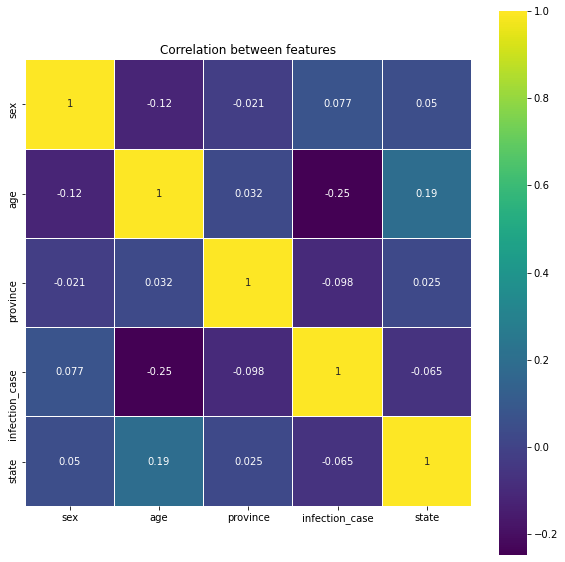

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
           annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [64]:
train_pre = raw_data[['sex','age','province','infection_case']]
train_pre.head()

,sex,age,province,infection_case
0,1.0,5.0,1,1
1,1.0,3.0,1,1
2,1.0,5.0,1,0
3,1.0,2.0,1,1
4,0.0,2.0,1,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre, 
                                                    raw_data[['state']], 
                                                    test_size=0.1, 
                                                    random_state=13)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 3442 to 338
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3403 non-null   float64
 1   age             3403 non-null   float64
 2   province        3403 non-null   int64  
 3   infection_case  3403 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 132.9 KB


In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 4517 to 542
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             379 non-null    float64
 1   age             379 non-null    float64
 2   province        379 non-null    int64  
 3   infection_case  379 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 14.8 KB


In [68]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 3442 to 338
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   state   3403 non-null   int64
dtypes: int64(1)
memory usage: 53.2 KB


In [69]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 4517 to 542
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   state   379 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [70]:
#이거 왜하는지 아시는분?

X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis=1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

In [89]:
from sklearn.tree import DecisionTreeClassifier

#학습기 객체 생성
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
#공부시키기
tree_clf.fit(X_train, y_train)
#train데이터를 가지고 공부한 점수
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.9782544813399942


In [88]:
from sklearn.metrics import accuracy_score #채점해주는 라이브러리

#문제를 주고 풀어보라고 함. => 정답 return!
y_pred = tree_clf.predict(X_test)

#테스트데이터를 푼 답안과 해답을 비교해서 정확도를 구해보자.
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  99.73614775725594


In [108]:
# sex: 0)여성 1)남성
# age: 0~6: n0대, 7: 70세 이상
# province: 1)수도권 2)경상 3) 전라 4) 충청 5) 강원 6)제주
# infection_case: 1) overseas inflow 0) 그 외(국내)

#'sex','age','province','infection_case',
dicaprio = [1., 5., 6., 0.]
kim = [0,4,2,1]
song = [1,1,1,0]
winslet = [1,5,2,1]
hong = [1,7,2,1]
kevin = [1,6,2,1]

# state: 0) 생존 1) deceased 
tree_clf.predict_proba([dicaprio]) # 생존[0], 유다희[1]

array([[0.98829431, 0.01170569]])

In [109]:
tree_clf.predict_proba([kim])

array([[0.99847328, 0.00152672]])

In [110]:
tree_clf.predict_proba([song])

array([[0.99847328, 0.00152672]])

In [111]:
tree_clf.predict_proba([winslet])

array([[0.98829431, 0.01170569]])

In [112]:
tree_clf.predict_proba([hong])

array([[0.75, 0.25]])

In [113]:
tree_clf.predict_proba([kevin])

array([[0.94300518, 0.05699482]])

In [119]:
round(tree_clf.predict_proba([kevin])[0][0]*100,2)

94.3

In [122]:
def survivalRate(name, info):
    print(name, '님은 ', round(tree_clf.predict_proba([info])[0][0]*100,2),
          '% 확률로 생존합니다.')
    
survivalRate('Kevin', kevin)
survivalRate('Hong', hong)

Kevin 님은  94.3 % 확률로 생존합니다.
Hong 님은  75.0 % 확률로 생존합니다.


In [124]:
#'sex','age','province','infection_case',
jeon = [0., 3., 1., 0.]
survivalRate('Hong', jeon)

Hong 님은  99.85 % 확률로 생존합니다.
